# Lab 3 - Visualization

Last update: 01/11/2023

- Name: 20120090  
- Student ID: Nguyễn Thế Hoàng

***

## Work and submission guidelines

**Work on your assignment**

- You will do your assignment directly in this notebook. First, fill in your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:** 

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [1]:
# visialize stuff
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
# !pip install geopandas
import geopandas
%pip install seaborn
import seaborn as sns

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchsummary import summary
from torchvision.transforms import ToTensor
import random

Note: you may need to restart the kernel to use updated packages.


## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer when I was a senior student
- Link: https://www.worldometers.info/coronavirus/

In [2]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - Country Name: A country that has data being colleced.
    - Total Cases: Reported total cumulative count of deteced and laboratory confirmed positive (or sometimes presumptive, suspect, probable cases of detected infection).
    - New Cases: Number of new cases reported each day.
    - Total Deaths: Reported total cumulataive count of people who have passed away due to Corona viruses.
    - New Deaths: Number of new death cases reported each day.
    - Total Recovered: Number of patients that has been treated and recovered to some condition.
    - Active Cases: $\text{Total Cases} - \text{Total Deaths} - \text{Total Recovered}$. Current number of people deteced and confirmed to be infected with the virus.
    - Critical Cases: Number of patients currently being treated in Intensive Care Unit.
    - Total Tests: Number of tests have been executed in the community.
    - Population: Current number of people who have respective nationality of that country.
    <br></br>
 
- Check the data with `info()` function

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [4]:
# TODO: drop New Cases, New Deaths, Critical Cases
df = df.drop(columns=['New Cases', 'New Deaths', 'Critical Cases'])

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    object
 2   Total Deaths     219 non-null    object
 3   Total Recovered  217 non-null    object
 4   Active Cases     217 non-null    object
 5   Total Tests      210 non-null    object
 6   Population       219 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [5]:
# TODO: convert data in df to integer. if the convert process returns error, leave it a None
def convert_to_int(x):
    try:
        # Remove commas and plus sign
        x = x.replace(',', '').replace('+', '')
        return int(x)
    except (ValueError, TypeError, AttributeError):
        return None

cols = df.columns[1:]
for col in cols:
    df[col] = df[col].apply(convert_to_int)

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     204 non-null    float64
 3   Total Recovered  217 non-null    float64
 4   Active Cases     217 non-null    float64
 5   Total Tests      210 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

Some values may be missing, undected `object` types that Pandas cannot convert to appropriate numerical type value. So Pandas let them as `NaN`.

In [6]:
# TODO: fill in the missing data with median value (except the first column)
cols = df.columns[1:]

for col in cols:
    df[col] = df[col].fillna(df[col].median())

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: Why do we have `float64` here?

We have only just dropped some promient missing columns. In the other columns, some values still are missing.

The `fillna()` convert `NaN` value to a `float64` type number (The `NaN` is basically a special floating-point value beforehand).

In [7]:
# TODO: save your new data frame to `./data/new_data.csv`
df.to_csv('./data/new_data.csv', index=False)

In [8]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [9]:
# # un-comment these lines of code
# df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


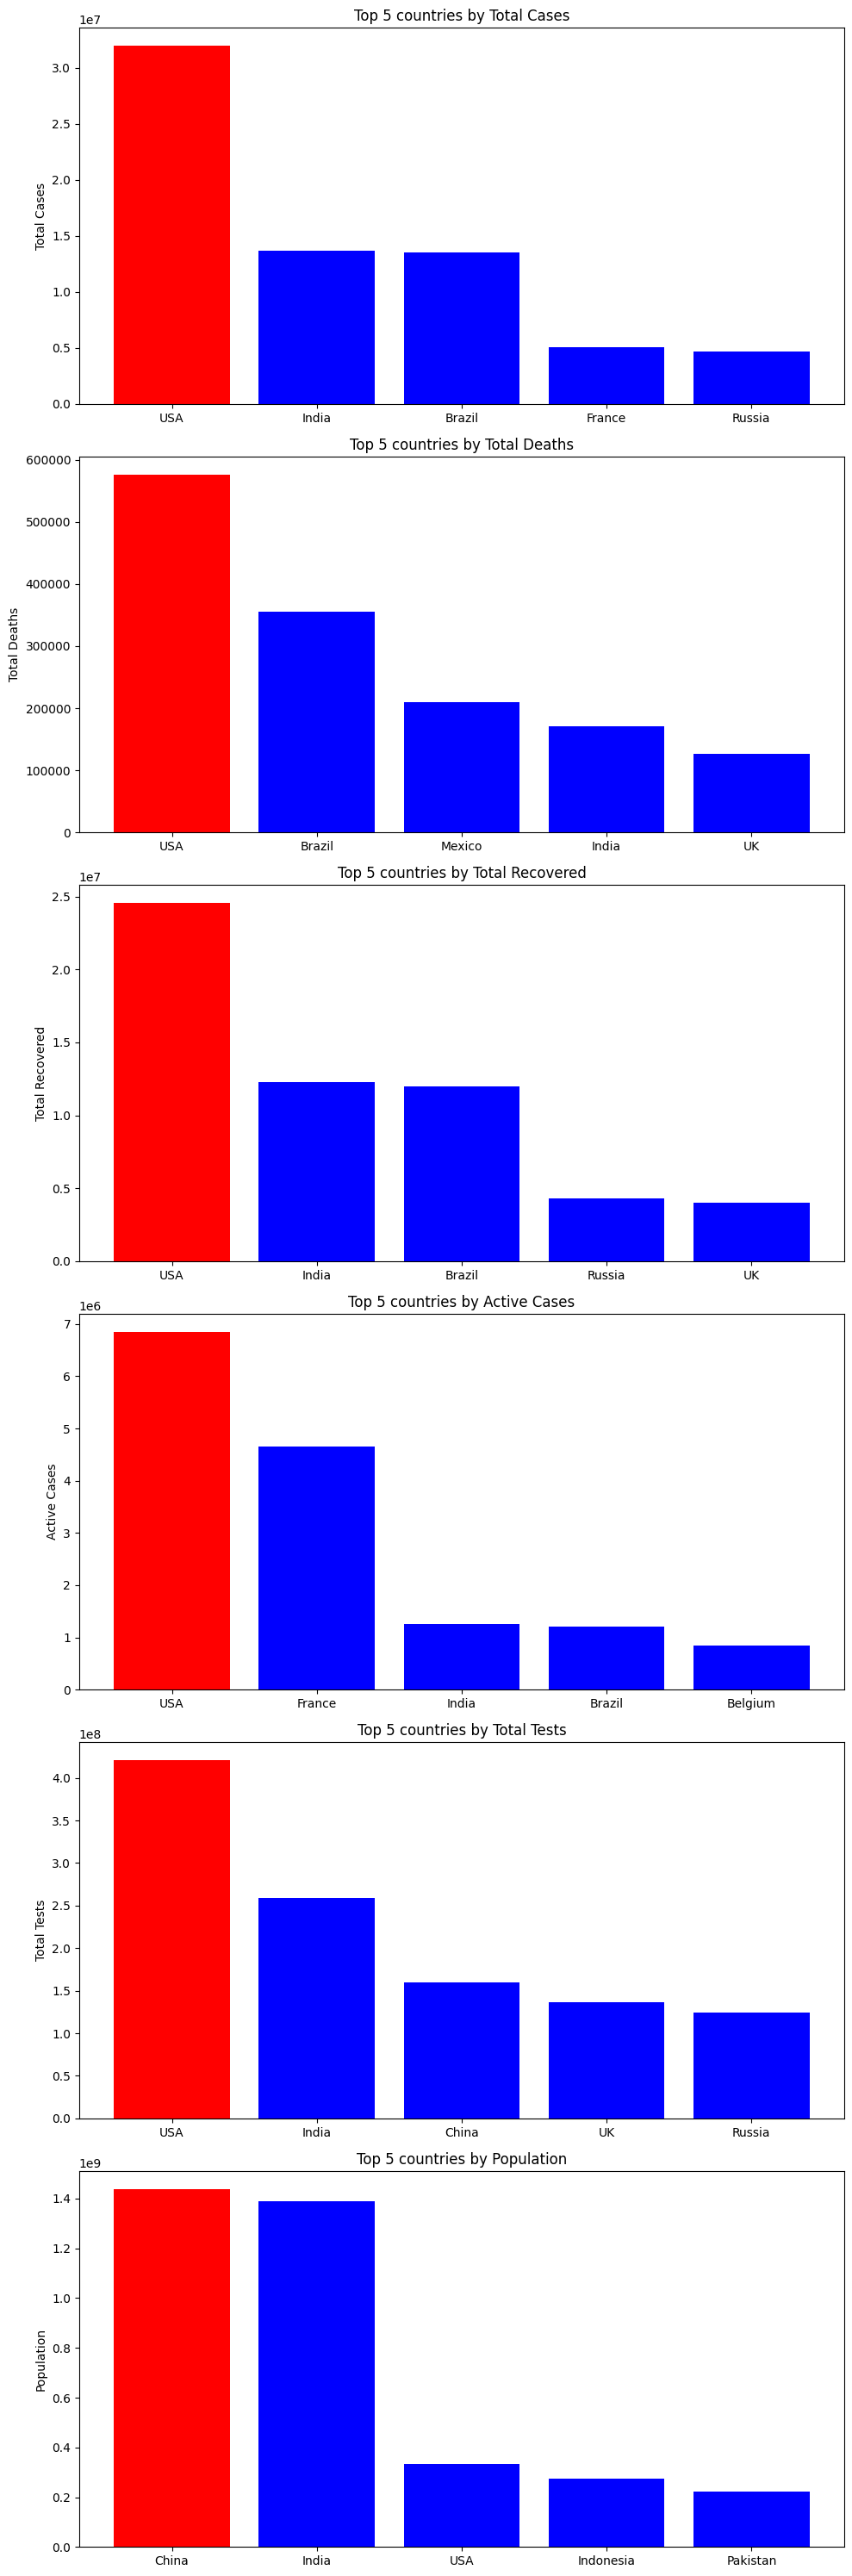

In [10]:
# TODO: draw 6 bar charts
cols = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']
fig, axs = plt.subplots(len(cols), 1, figsize=(10, 30))

for i, col in enumerate(cols):
    # Sort by the column in descending order and take the first 5 rows
    top5 = df.sort_values(by=col, ascending=False).head(5)

    colors = ['red' if x == max(top5[col]) else 'blue' for x in top5[col]]
    
    # Create a bar chart in the i-th subplot
    axs[i].bar(top5['Country Name'], top5[col], color=colors)
    axs[i].set_title(f'Top 5 countries by {col}')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which show the number of cases for each country. Specifically, you are provided a file named `coord.csv` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

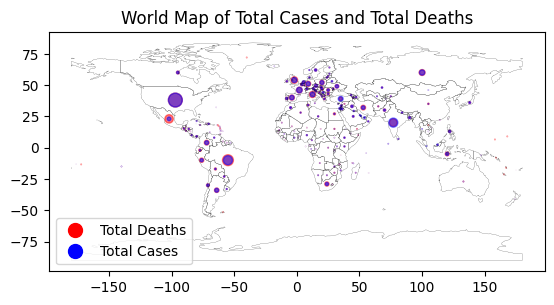

In [11]:
# TODO: draw 2 world map chart using geopandas

with open('./data/coord.json') as f:
    data = json.load(f)
coords = pd.DataFrame({
    'Country Name': list(data['lat'].keys()),
    'Latitude': list(data['lat'].values()),
    'Longitude': list(data['long'].values())
})

merged = pd.merge(df, coords, on='Country Name')
gdf = geopandas.GeoDataFrame(merged, geometry=geopandas.points_from_xy(merged.Longitude, merged.Latitude))

# Load the map image
world = geopandas.read_file('./data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
world.boundary.plot(color='black', linewidth=0.125)

# Normalize 'Total Cases' and 'Total Deaths' to a suitable range for marker sizes
gdf['Total Cases Size'] = (gdf['Total Cases'] / gdf['Total Cases'].max()) * 100
gdf['Total Deaths Size'] = (gdf['Total Deaths'] / gdf['Total Deaths'].max()) * 100
gdf.plot(marker='o', color='red', markersize=gdf['Total Deaths Size'], ax=plt.gca(), alpha=0.5)
gdf.plot(marker='o', color='blue', markersize=gdf['Total Cases Size'], ax=plt.gca(), alpha=0.5)

red_circle = matplotlib.lines.Line2D([], [], color='red', marker='o', linestyle='None',
                           markersize=10, label='Total Deaths')
blue_circle = matplotlib.lines.Line2D([], [], color='blue', marker='o', linestyle='None',
                            markersize=10, label='Total Cases')
plt.legend(handles=[red_circle, blue_circle], loc='best')
plt.title('World Map of Total Cases and Total Deaths')

plt.show()

### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

c:\Users\theho\miniconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\theho\miniconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\theho\miniconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\theho\miniconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

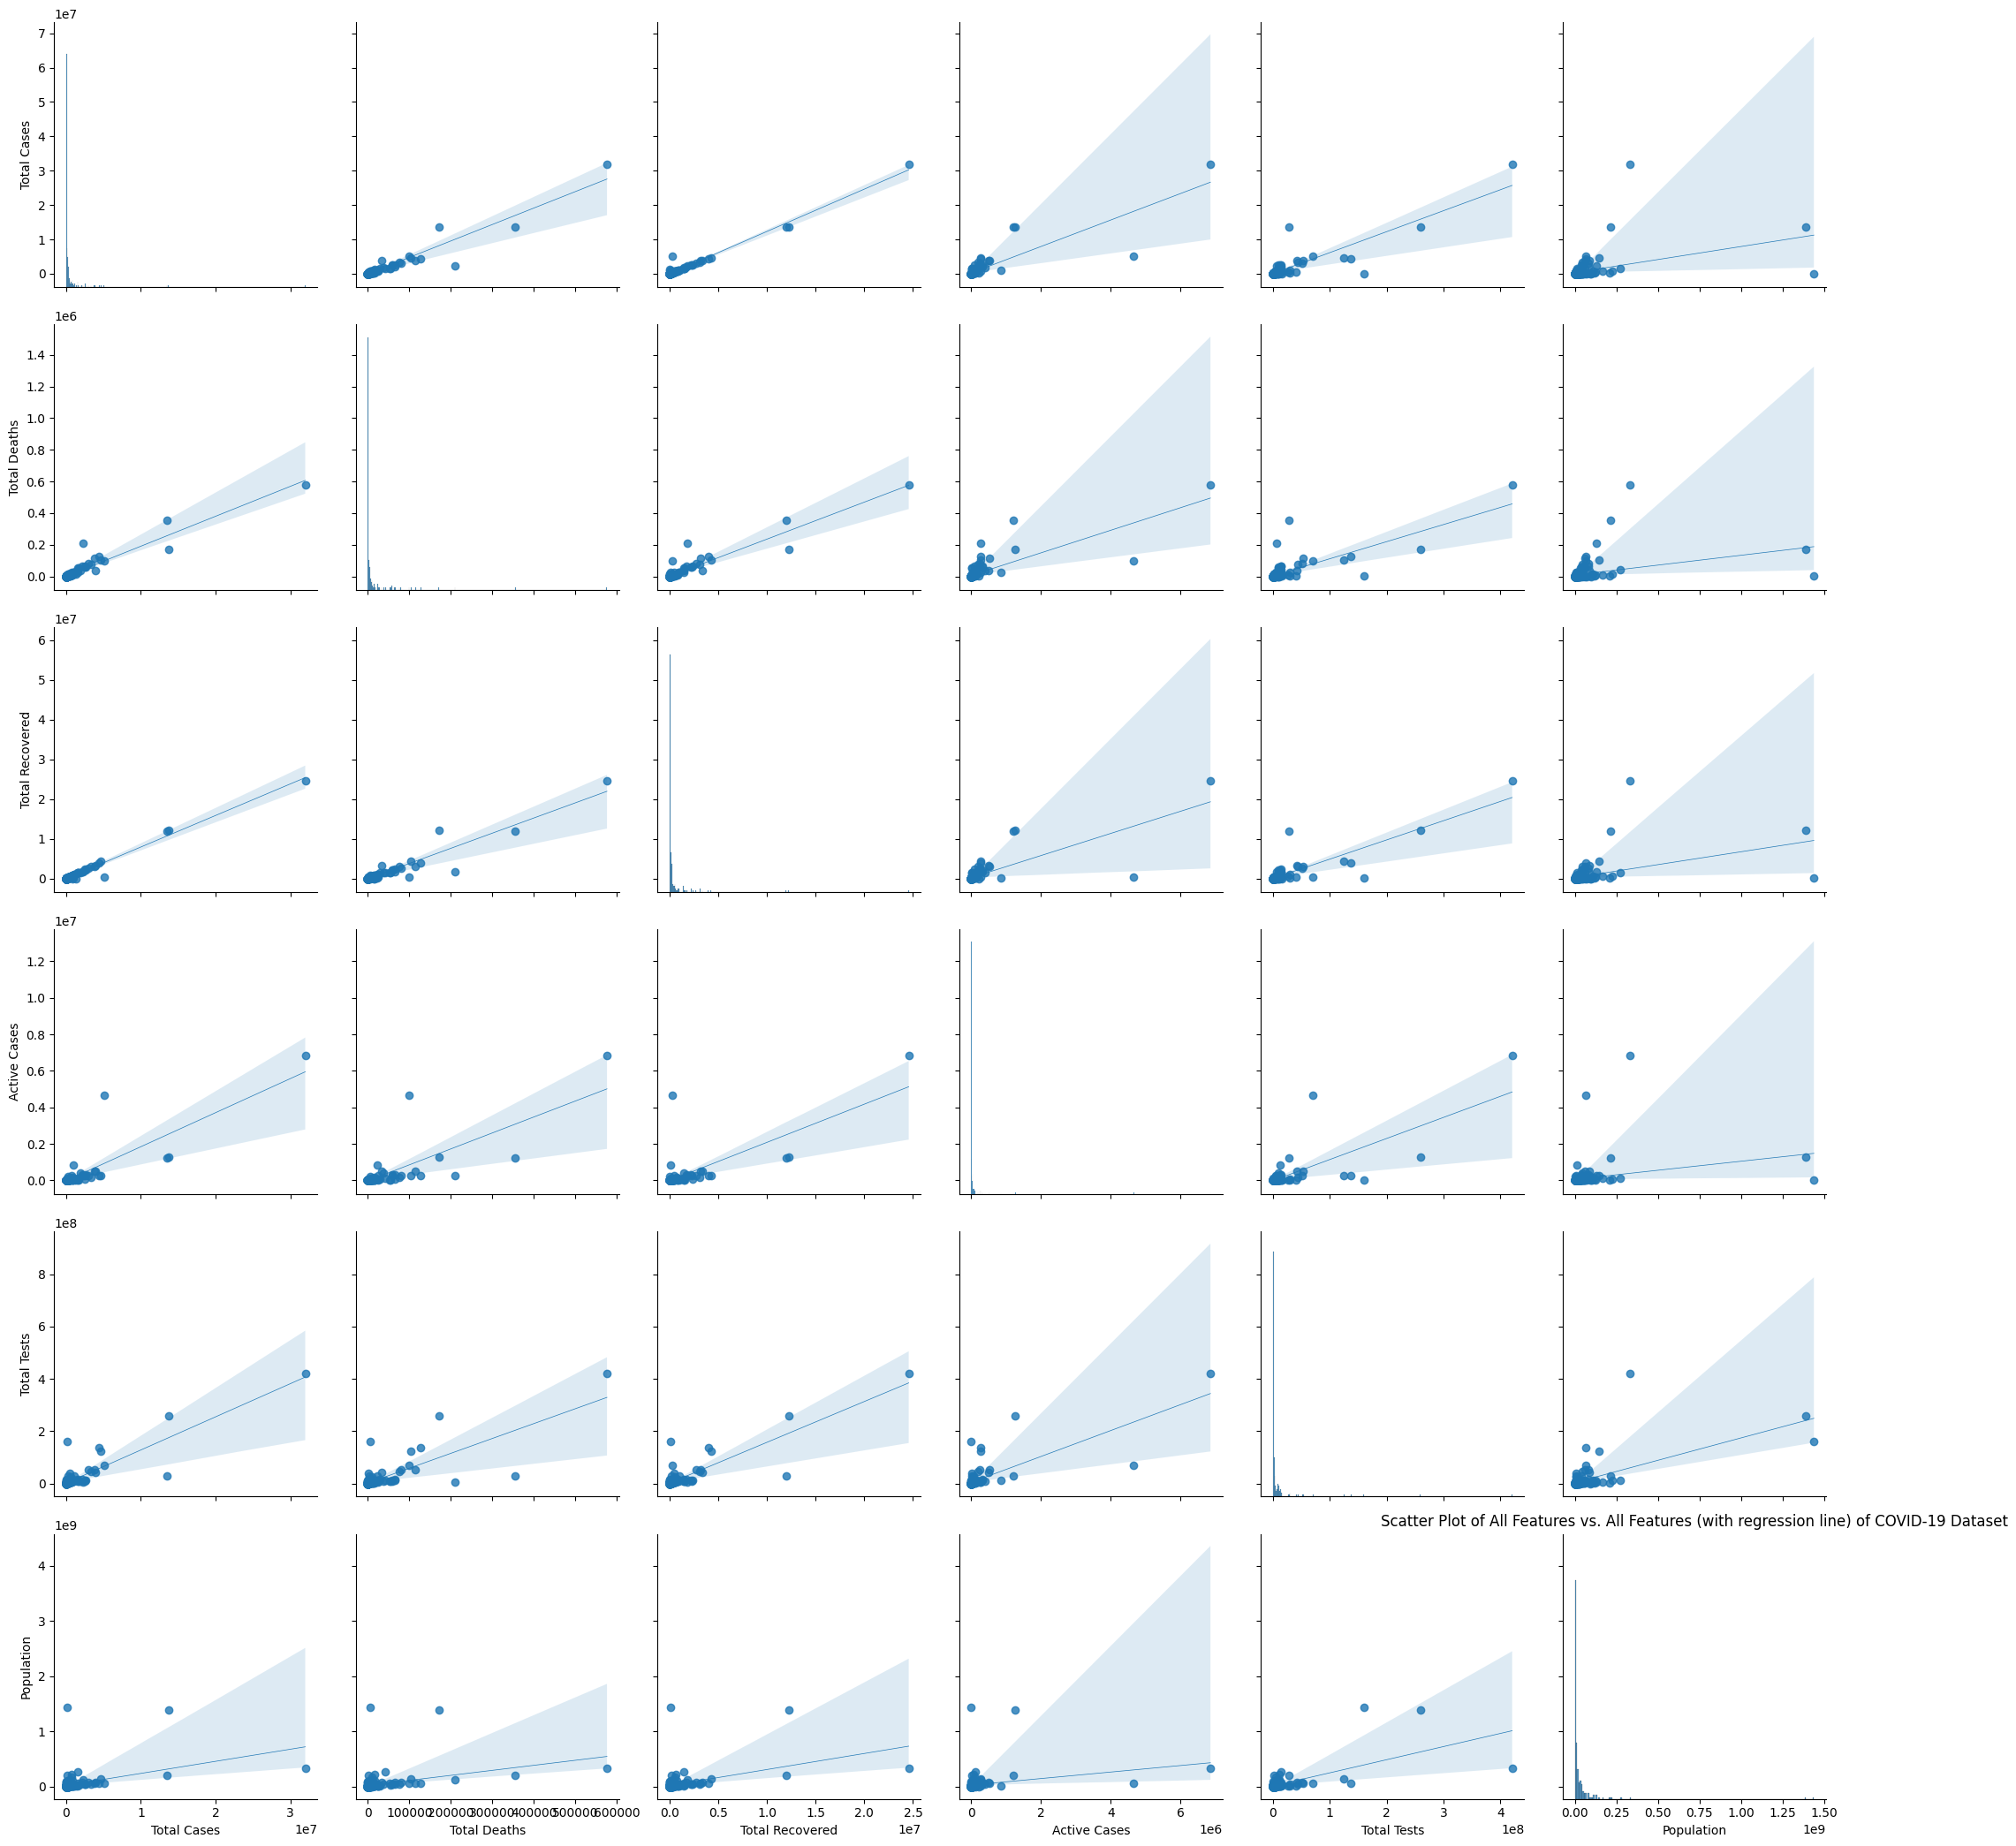

In [20]:
# TODO: scatter stuff

cols = df.columns[1:]
plot = sns.pairplot(df[cols], kind='reg', height=3.5, plot_kws={'line_kws':{'linewidth':0.5}})

plt.title('Scatter Plot of All Features vs. All Features (with regression line) of COVID-19 Dataset')
plt.tight_layout()
plt.show()

**TODO**: As showed above, give your prediction about the relationship between each pair.

...

### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

                 Total Cases  Total Deaths  Total Recovered  Active Cases  \
Total Cases         1.000000      0.951657         0.988696      0.847869   
Total Deaths        0.951657      1.000000         0.944121      0.789273   
Total Recovered     0.988696      0.944121         1.000000      0.763274   
Active Cases        0.847869      0.789273         0.763274      1.000000   
Total Tests         0.879253      0.783784         0.868501      0.755964   
Population          0.407222      0.336439         0.433467      0.241293   

                 Total Tests  Population  
Total Cases         0.879253    0.407222  
Total Deaths        0.783784    0.336439  
Total Recovered     0.868501    0.433467  
Active Cases        0.755964    0.241293  
Total Tests         1.000000    0.637476  
Population          0.637476    1.000000  


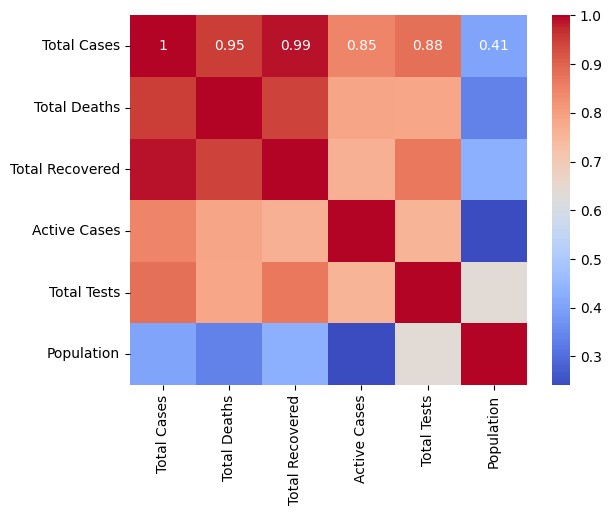

In [13]:
# TODO: create heatamp

cols = df.columns[1:]
# Calculate the correlation matrix
corr_matrix = df[cols].corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader

We need to load multiple instances belong to a dataset at once to create Batches. We also need some mechanism to control the batch size and order of loaded instances while training and testing.

In [14]:
# TODO: download training, testing data and store them into training_data and testing_data
# Then, create train_dataloader and test_dataloader with batch_size=32

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')

BATCH_SIZE = 32

# Download the MNIST dataset
training_dataset = datasets.MNIST('./data', train=True, download=True, transform=ToTensor())
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=ToTensor())

# Create data loaders
train_dataloader = DataLoader(training_dataset, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

Using cpu for training and testing


- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

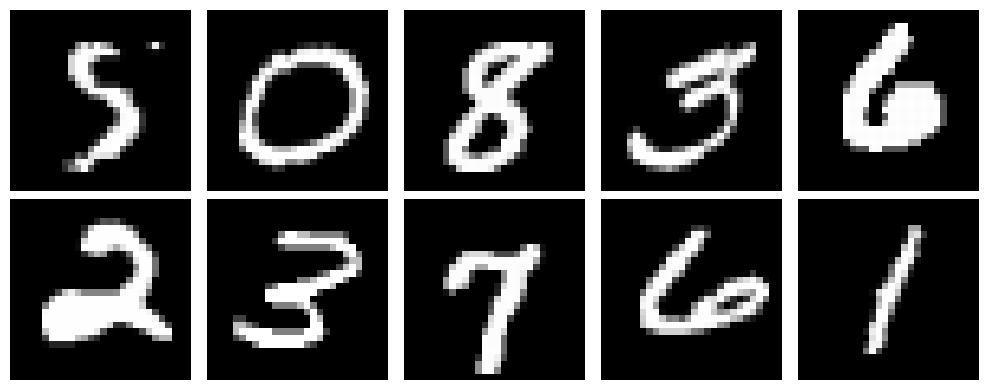

In [15]:
# Select 10 random samples
indices = np.random.choice(len(training_dataset), size=10, replace=False)
samples = [training_dataset[i][0] for i in indices] # training_dataset[i][0] is the i-th sample. training_dataset[i][1] is the label of the i-th sample.

fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(samples[i*5 + j].reshape(28, 28), cmap='gray')  # Reshape the tensor object
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [16]:
# TODO: create Mnist_FC and Mnist_CNN

CLASS_SIZE = 10
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_SIZE = IMAGE_WIDTH * IMAGE_HEIGHT

CNN_NUMBER_KERNELS = 20
CNN_KERNEL_SIZE = 5
POOLING_SIZE = 2

class Mnist_FC(nn.Module):
    
    def __init__(self):
        super(Mnist_FC, self).__init__()
        self.flattenLayer = nn.Flatten()
        self.linearStack = nn.Sequential(

            nn.Linear(IMAGE_SIZE, 1024),
            nn.ReLU(),

            nn.Linear(1024, 512),
            nn.ReLU(),

            nn.Linear(512, CLASS_SIZE),
            nn.LogSoftmax(dim=1)

        )

    def forward(self, x):
        x = self.flattenLayer(x)
        logits = self.linearStack(x)

        return logits
    
class Mnist_CNN(nn.Module):
    
    def __init__(self):
        super(Mnist_CNN, self).__init__()
        self.linearStack = nn.Sequential(

            nn.Conv2d(1, CNN_NUMBER_KERNELS, CNN_KERNEL_SIZE),
            nn.ReLU(),
            nn.MaxPool2d(POOLING_SIZE),

            nn.Conv2d(20, CNN_NUMBER_KERNELS, CNN_KERNEL_SIZE),
            nn.ReLU(),
            nn.MaxPool2d(POOLING_SIZE),

            nn.Flatten(),
            nn.Linear(CNN_NUMBER_KERNELS * 4 * 4, CLASS_SIZE),
            nn.LogSoftmax(dim=1)

        )

    def forward(self, x):
        logits = self.linearStack(x)

        return logits
    
mnistFC = Mnist_FC().to(device)
mnistCNN = Mnist_CNN().to(device)

_ = summary(mnistFC, (1, IMAGE_WIDTH, IMAGE_HEIGHT))
_ = summary(mnistCNN, (1, IMAGE_WIDTH, IMAGE_HEIGHT))

Layer (type:depth-idx)                   Output Shape              Param #
├─Flatten: 1-1                           [-1, 784]                 --
├─Sequential: 1-2                        [-1, 10]                  --
|    └─Linear: 2-1                       [-1, 1024]                803,840
|    └─ReLU: 2-2                         [-1, 1024]                --
|    └─Linear: 2-3                       [-1, 512]                 524,800
|    └─ReLU: 2-4                         [-1, 512]                 --
|    └─Linear: 2-5                       [-1, 10]                  5,130
|    └─LogSoftmax: 2-6                   [-1, 10]                  --
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
Total mult-adds (M): 2.66
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 5.09
Estimated Total Size (MB): 5.10
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]           

### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?

...

In [17]:
# TODO: design train and test function

def getOptimizer(model, lr):
    return torch.optim.SGD(model.parameters(), lr=lr)

def train(dataLoader, model, lossFunc, optimizer):

    for batch, (X, Y) in enumerate(dataLoader):
        # Print the progress
        if batch % 100 == 0:
            print(f'Batch {batch} / {len(dataLoader)}')

        pred = model(X.to(device))
        loss = lossFunc(pred, Y.to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def test(dataLoader, model):
    correct = 0

    with torch.no_grad():
        for (X, Y) in dataLoader:
            pred = model(X.to(device))
            correct += ((pred.argmax(1) == (Y.to(device)) ).type(torch.float).sum().item())

    correct /= len(dataLoader.dataset)

    return correct

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

...

In [ ]:
# TODO: run 20 epochs for Mnist_FC and Mnist_CNN

EPOCH_SIZE = 20

history_fc = {}
history_cnn = {}

for t in range(EPOCH_SIZE):
    print(f'Epoch {t+1}\n-------------------------------')
    
    train(train_dataloader, mnistFC, nn.NLLLoss(), getOptimizer(mnistFC, 0.01))
    train(train_dataloader, mnistCNN, nn.NLLLoss(), getOptimizer(mnistCNN, 0.01))

    train_acc_fc = test(train_dataloader, mnistFC)
    test_acc_fc = test(test_dataloader, mnistFC)
    train_acc_cnn = test(train_dataloader, mnistCNN)
    test_acc_cnn = test(test_dataloader, mnistCNN)

    print(f'FC Training Accuracy: {train_acc_fc}')
    print(f'FC Testing Accuracy: {test_acc_fc}')
    print(f'CNN Training Accuracy: {train_acc_cnn}')
    print(f'CNN Testing Accuracy: {test_acc_cnn}')

    history_fc[t] = [train_acc_fc, test_acc_fc]
    history_cnn[t] = [train_acc_cnn, test_acc_cnn]


### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment

- CNN architecture model has higher accuracy than Fully Connected architecture model overall.
- CNN architecture model converges faster than Fully Connected architecture model.
- Fully Connected architecture model is overfitted after about 10 training epochs. 

In [ ]:
# Extract values from history_fc and history_cnn
epochs_fc = list(history_fc.keys())
train_acc_fc = [history_fc[epoch][0] for epoch in epochs_fc]
test_acc_fc = [history_fc[epoch][1] for epoch in epochs_fc]

epochs_cnn = list(history_cnn.keys())
train_acc_cnn = [history_cnn[epoch][0] for epoch in epochs_cnn]
test_acc_cnn = [history_cnn[epoch][1] for epoch in epochs_cnn]

# Plot training accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs_fc, train_acc_fc, label='FC Train Accuracy')
plt.plot(epochs_cnn, train_acc_cnn, label='CNN Train Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot test accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs_fc, test_acc_fc, label='FC Test Accuracy')
plt.plot(epochs_cnn, test_acc_cnn, label='CNN Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` using Colab